<a href="https://colab.research.google.com/github/CharlyPierce/Regression/blob/main/Regresion_multinomial_logistica_05_11_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
a=[[-3,-3,1],[-3,-2,1],[-2,-3,1],[-2,-1,1],[-3,-1,1],[-3,-4,1]]
b=[[1,8,2],[1,9,2],[2,8,2],[2,10,2]]
c=[[5,3,3],[5,4,3],[6,3,3],[6,5,3]]
x1=[]
x2=[]
y =[]

[x1.append(a[i][0]) for i in range(len(a))]
[x1.append(b[i][0]) for i in range(len(b))]
[x1.append(c[i][0]) for i in range(len(c))]

[x2.append(a[i][1]) for i in range(len(a))]
[x2.append(b[i][1]) for i in range(len(b))]
[x2.append(c[i][1]) for i in range(len(c))]

[y.append(a[i][2]-1) for i in range(len(a))]
[y.append(b[i][2]-1) for i in range(len(b))]
[y.append(c[i][2]-1) for i in range(len(c))]


ds=pd.DataFrame((x1,x2,y),index=('x1','x2','y')).T
import sklearn.preprocessing 
from sklearn.compose import make_column_transformer
ohe=make_column_transformer((sklearn.preprocessing.OneHotEncoder(),[2]))
ds1=pd.DataFrame(np.array(np.concatenate((ds.iloc[:,:-1].values,ohe.fit_transform(ds)),axis=1),dtype=np.int))


def mo():
  y0=[0,0,0,0]
  for i in range(len(ds.iloc[:,0])):
    if(ds.iloc[i,-1:].values==0):
      y0[0]=y0[0]+ds.iloc[i,:-1].values
      y0[1]+=1
    else:
      y0[2]=y0[2]+ds.iloc[i,:-1].values
      y0[3]+=1
  return (y0[0]/y0[1],y0[2]/y0[3],y0[1]/len(ds.iloc[:,-1:]),y0[3]/len(ds.iloc[:,-1:]))
mo,m1,phi,phi1=mo()
# mo,m1=mo.reshape(3,1),m1.reshape(1,3)
mo,m1,phi,phi1


rs=[np.zeros((2, 2)),np.zeros((2, 2)),0,0]#sigma pra todos los dato
for i in range(len(ds.iloc[:,0])):
  if(ds.iloc[i,-1:].values==0):
    rs[0]=rs[0]+(ds.iloc[i,:-1].values-mo).reshape(2,1)*(ds.iloc[i,:-1].values-mo)#sigma para todos los datos
    rs[2]+=1
  else:
    rs[1]=rs[1]+(ds.iloc[i,:-1].values-m1).reshape(2,1)*(ds.iloc[i,:-1].values-m1)
rs[3]=len(ds.iloc[:,0])-rs[2]
rs[0]=rs[0]/rs[2]
rs[1]=rs[1]/rs[3]


for i in range(len(ds.iloc[:,0])):# sin if
  #probabilidad de que pertenesca a clase uno y=1
  aba=(  (2*np.pi)**(2/2) ) *  (  np.linalg.det(rs[0])**(1/2) )
  exp1=np.dot(np.dot((ds.iloc[i,:-1].values-m1).reshape(1,2),np.linalg.inv(rs[0])),(ds.iloc[i,:-1].values-m1).reshape(2,1))
  exp2=np.e**((-1/2)*exp1)
  one=phi*(1/aba)*exp2.reshape(-1)

  #probabilidad de que pertenesca a clase cero y=0
  aba=(  (2*np.pi)**(2/2) ) *  (  np.linalg.det(rs[0])**(1/2) )
  exp1=np.dot(np.dot((ds.iloc[i,:-1].values-mo).reshape(1,2),np.linalg.inv(rs[0])),(ds.iloc[i,:-1].values-mo).reshape(2,1))
  exp2=np.e**((-1/2)*exp1)
  two=(1-phi)*(1/aba)*exp2.reshape(-1)
  # print( one,two  )
  #primer valor probabilidad de pertenecer a clase 1
  #segundo valor probabilidad de pertenecer a clase 2
  print( int(np.round(np.e**(one)/(np.e**(one)+np.e**(two)))),int(np.round(np.e**(two)/(np.e**(one)+np.e**(two))))  )

GDA

In [ ]:
a=[[-3,-3,1],[-3,-2,1],[-2,-3,1],[-2,-1,1],[-3,-1,1],[-3,-4,1]]
b=[[1,8,2],[1,9,2],[2,8,2],[2,10,2]]
#c=[[5,3,3],[5,4,3],[6,3,3],[6,5,3]]
x1=[]
x2=[]
y =[]

[x1.append(a[i][0]) for i in range(len(a))]
[x1.append(b[i][0]) for i in range(len(b))]
#[x1.append(c[i][0]) for i in range(len(c))]

[x2.append(a[i][1]) for i in range(len(a))]
[x2.append(b[i][1]) for i in range(len(b))]
#[x2.append(c[i][1]) for i in range(len(c))]

[y.append(a[i][2]-1) for i in range(len(a))]
[y.append(b[i][2]-1) for i in range(len(b))]
#[y.append(c[i][2]) for i in range(len(c))]

# x0=[1]*len(x1)

ds=pd.DataFrame((x1,x2,y),index=('x1','x2','y')).T
import sklearn.preprocessing 
from sklearn.compose import make_column_transformer
ohe=make_column_transformer((sklearn.preprocessing.OneHotEncoder(),[2]))
ds1=pd.DataFrame(np.array(np.concatenate((ds.iloc[:,:-1].values,ohe.fit_transform(ds)),axis=1),dtype=np.int))
theta=np.random.random([3,3])

In [ ]:
ds.head(8)

,x1,x2,y
0,-3,-3,0
1,-3,-2,0
2,-2,-3,0
3,-2,-1,0
4,-3,-1,0
5,-3,-4,0
6,1,8,1
7,1,9,1


In [ ]:
def mo():
  y0=[0,0,0,0]
  for i in range(len(ds.iloc[:,0])):
    if(ds.iloc[i,-1:].values==0):
      y0[0]=y0[0]+ds.iloc[i,:-1].values
      y0[1]+=1
    else:
      y0[2]=y0[2]+ds.iloc[i,:-1].values
      y0[3]+=1
  return (y0[0]/y0[1],y0[2]/y0[3],y0[1]/len(ds.iloc[:,-1:]),y0[3]/len(ds.iloc[:,-1:]))
mo,m1,phi,phi1=mo()
# mo,m1=mo.reshape(3,1),m1.reshape(1,3)
mo,m1,phi,phi1

(array([-2.66666667, -2.33333333]), array([1.5 , 8.75]), 0.6, 0.4)

In [ ]:
rs=[np.zeros((2, 2)),np.zeros((2, 2)),0,0]#sigma pra todos los dato
for i in range(len(ds.iloc[:,0])):
  if(ds.iloc[i,-1:].values==0):
    rs[0]=rs[0]+(ds.iloc[i,:-1].values-mo).reshape(2,1)*(ds.iloc[i,:-1].values-mo)#sigma para todos los datos
    rs[2]+=1
  else:
    rs[1]=rs[1]+(ds.iloc[i,:-1].values-m1).reshape(2,1)*(ds.iloc[i,:-1].values-m1)
rs[3]=len(ds.iloc[:,0])-rs[2]
rs[0]=rs[0]/rs[2]
rs[1]=rs[1]/rs[3]

In [ ]:
rs[0],rs[1]

(array([[0.23333333, 0.11666667],
        [0.11666667, 1.00833333]]), array([[0., 0.],
        [0., 0.]]))

In [ ]:
#q pasa si no esta el if
rs=[np.zeros((2, 2)),np.zeros((2, 2)),0,0]#sigma pra todos los dato
for i in range(len(ds.iloc[:,0])):
  if(ds.iloc[i,-1:].values==0):
    rs[0]=rs[0]+(ds.iloc[i,:-1].values-mo).reshape(2,1)*(ds.iloc[i,:-1].values-mo)#sigma para todos los datos
    rs[2]+=1
  else:
    rs[0]=rs[0]+(ds.iloc[i,:-1].values-m1).reshape(2,1)*(ds.iloc[i,:-1].values-m1)
rs[3]=len(ds.iloc[:,0])-rs[2]
rs[0]=rs[0]/len(ds.iloc[:,0])
# rs[1]=rs[1]/rs[3]

In [ ]:
#probabilidad de que pertenesca a clase uno y=1 sin if
aba=(  (2*np.pi)**(2/2) ) *  (  np.linalg.det(rs[0])**(1/2) )
exp1=np.dot(np.dot((ds.iloc[0,:-1].values-m1).reshape(1,2),np.linalg.inv(rs[0])),(ds.iloc[0,:-1].values-m1).reshape(2,1))
exp2=np.e**((-1/2)*exp1)
one=phi*(1/aba)*exp2
one

array([[6.80541925e-41]])

In [ ]:
#probabilidad de que pertenesca a clase cero y=0 sin if
aba=(  (2*np.pi)**(2/2) ) *  (  np.linalg.det(rs[0])**(1/2) )
exp1=np.dot(np.dot((ds.iloc[0,:-1].values-mo).reshape(1,2),np.linalg.inv(rs[0])),(ds.iloc[0,:-1].values-mo).reshape(2,1))
exp2=np.e**((-1/2)*exp1)
two=(1-phi)*(1/aba)*exp2
two

array([[0.09342917]])

In [ ]:
for i in range(len(ds.iloc[:,0])):# sin if
  #probabilidad de que pertenesca a clase uno y=1
  aba=(  (2*np.pi)**(2/2) ) *  (  np.linalg.det(rs[0])**(1/2) )
  exp1=np.dot(np.dot((ds.iloc[i,:-1].values-m1).reshape(1,2),np.linalg.inv(rs[0])),(ds.iloc[i,:-1].values-m1).reshape(2,1))
  exp2=np.e**((-1/2)*exp1)
  one=phi*(1/aba)*exp2.reshape(-1)

  #probabilidad de que pertenesca a clase cero y=0
  aba=(  (2*np.pi)**(2/2) ) *  (  np.linalg.det(rs[0])**(1/2) )
  exp1=np.dot(np.dot((ds.iloc[i,:-1].values-mo).reshape(1,2),np.linalg.inv(rs[0])),(ds.iloc[i,:-1].values-mo).reshape(2,1))
  exp2=np.e**((-1/2)*exp1)
  two=(1-phi)*(1/aba)*exp2.reshape(-1)
  # print( one,two  )
  #primer valor probabilidad de pertenecer a clase 1
  #segundo valor probabilidad de pertenecer a clase 2
  print( int(np.round(np.e**(one)/(np.e**(one)+np.e**(two)))),int(np.round(np.e**(two)/(np.e**(one)+np.e**(two))))  )

0 1
0 1
0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0


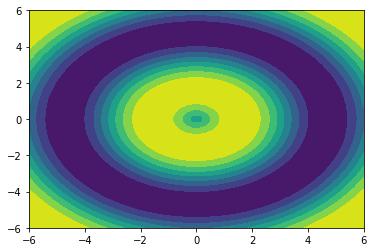

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# fig=plt.figure()
# ax=Axes3D(fig)

x=np.linspace(-6,6,50)
y=np.linspace(-6,6,50)#crea 50 puntosn entre -4 y 4
X,Y=np.meshgrid(x,y)#crea matrices de coordenadas
def z(x,y):
  return np.sin(np.sqrt(x**2+y**2))

# cor= sorted(zip(x,y))#zip crea un opbeto zio sorted los une cordenada a cordenada
# exp1=np.dot(np.dot((cor[0]-m1).reshape(1,2),np.linalg.inv(rs[0])),(cor[0]-m1).reshape(2,1))
# exp2=np.e**((-1/2)*exp1)
# ax.plot_surface(X,Y,z(X,Y))
# ax.contour(X,Y,z(X,Y))

plt.contourf(X,Y,z(X,Y))

In [ ]:
#probabilidad de que pertenesca a clase uno y=1
aba=(  (2*np.pi)**(2/2) ) *  (  np.linalg.det(rs[1])**(1/2) )
exp1=np.dot(np.dot((ds.iloc[0,:-1].values-m1).reshape(1,2),np.linalg.inv(rs[0])),(ds.iloc[0,:-1].values-m1).reshape(2,1))
exp2=np.e**((-1/2)*exp1)
one=phi*(1/aba)*exp2
one

array([[6.27521916e-38]])

In [ ]:
#probabilidad de que pertenesca a clase cero y=0
aba=(  (2*np.pi)**(2/2) ) *  (  np.linalg.det(rs[1])**(1/2) )
exp1=np.dot(np.dot((ds.iloc[0,:-1].values-mo).reshape(1,2),np.linalg.inv(rs[0])),(ds.iloc[0,:-1].values-mo).reshape(2,1))
exp2=np.e**((-1/2)*exp1)
two=(1-phi)*(1/aba)*exp2
two

array([[0.1126847]])

In [ ]:
for i in range(len(ds.iloc[:,0])):
  #probabilidad de que pertenesca a clase uno y=1
  aba=(  (2*np.pi)**(2/2) ) *  (  np.linalg.det(rs[1])**(1/2) )
  exp1=np.dot(np.dot((ds.iloc[i,:-1].values-m1).reshape(1,2),np.linalg.inv(rs[0])),(ds.iloc[i,:-1].values-m1).reshape(2,1))
  exp2=np.e**((-1/2)*exp1)
  one=phi*(1/aba)*exp2.reshape(-1)

  #probabilidad de que pertenesca a clase cero y=0
  aba=(  (2*np.pi)**(2/2) ) *  (  np.linalg.det(rs[1])**(1/2) )
  exp1=np.dot(np.dot((ds.iloc[i,:-1].values-mo).reshape(1,2),np.linalg.inv(rs[0])),(ds.iloc[i,:-1].values-mo).reshape(2,1))
  exp2=np.e**((-1/2)*exp1)
  two=(1-phi)*(1/aba)*exp2.reshape(-1)
  # print( one,two  )
  #primer valor probabilidad de pertenecer a clase 1
  #segundo valor probabilidad de pertenecer a clase 2
  print( int(np.round(np.e**(one)/(np.e**(one)+np.e**(two)))),int(np.round(np.e**(two)/(np.e**(one)+np.e**(two))))  )

0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0


In [ ]:
A=[-1,0]
#probabilidad de que pertenesca a clase uno y=1
aba=(  (2*np.pi)**(2/2) ) *  (  np.linalg.det(rs[1])**(1/2) )
exp1=np.dot(np.dot((np.array(A)-m1).reshape(1,2),np.linalg.inv(rs[0])),(np.array(A)-m1).reshape(2,1))
exp2=np.e**((-1/2)*exp1)
one=phi*(1/aba)*exp2.reshape(-1)

#probabilidad de que pertenesca a clase cero y=0
aba=(  (2*np.pi)**(2/2) ) *  (  np.linalg.det(rs[1])**(1/2) )
exp1=np.dot(np.dot((np.array(A)-mo).reshape(1,2),np.linalg.inv(rs[0])),(np.array(A)-mo).reshape(2,1))
exp2=np.e**((-1/2)*exp1)
two=(1-phi)*(1/aba)*exp2.reshape(-1)
# print( one,two  )
#primer valor probabilidad de pertenecer a clase 1
#segundo valor probabilidad de pertenecer a clase 2
print( int(np.round(np.e**(one)/(np.e**(one)+np.e**(two)))),int(np.round(np.e**(two)/(np.e**(one)+np.e**(two))))  )

0 1


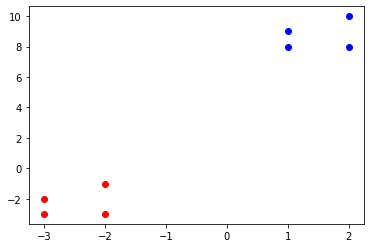

In [ ]:
for i in range(len(ds.iloc[:,0])):
  if(ds.iloc[i,-1:].values==0):
    plt.scatter(ds.iloc[i,0],ds.iloc[i,1],c='red')# clase 2 son ceros
  else:
    plt.scatter(ds.iloc[i,0],ds.iloc[i,1],c='blue')# clase 1 son unos

In [ ]:
s1=(ds.iloc[0,:-1].values-mo).reshape(1,3)*(ds.iloc[0,:-1].values-mo).reshape(3,1)

In [ ]:
s2=(ds.iloc[1,:-1].values-mo).reshape(1,3)*(ds.iloc[1,:-1].values-mo).reshape(3,1)

In [ ]:
s3=(ds.iloc[2,:-1].values-mo).reshape(1,3)*(ds.iloc[2,:-1].values-mo).reshape(3,1)

In [ ]:
s4=(ds.iloc[3,:-1].values-mo).reshape(1,3)*(ds.iloc[3,:-1].values-mo).reshape(3,1)

In [ ]:
(s1+s2+s3+s4)/4

array([[0.    , 0.    , 0.    ],
       [0.    , 0.25  , 0.125 ],
       [0.    , 0.125 , 0.6875]])

In [ ]:
a=[[-3,1]]
b=[[8,0]]

x1=[]
x2=[]
y =[]

[x1.append(a[i][0]) for i in range(len(a))]
[x1.append(b[i][0]) for i in range(len(b))]

#[x2.append(a[i][1]) for i in range(len(a))]
#[x2.append(b[i][1]) for i in range(len(b))]

[y.append(a[i][1]) for i in range(len(a))]
[y.append(b[i][1]) for i in range(len(b))]

x0=[1]*len(x1)
ds=pd.DataFrame((x0,x1,y),index=('x0','x1','y')).T

import sklearn.preprocessing 
from sklearn.compose import make_column_transformer
ohe=make_column_transformer((sklearn.preprocessing.OneHotEncoder(),[1]))
ds1=pd.DataFrame(np.array(np.concatenate((ds.iloc[:,:-1].values,ohe.fit_transform(ds)),axis=1),dtype=np.int))


In [ ]:
ds.head(2)

,x0,x1,y
0,1,-3,1
1,1,8,0


In [ ]:
theta1=np.random.rand(2)
theta1

array([0.63343687, 0.29677024])

In [ ]:
si=0
th=1
def h(r):
  return np.divide(1,(1+np.exp(-1*r)))

for i in range(len(ds.iloc[:,0])):
  th11=(ds.iloc[i,:-1].values*theta1).sum()
  si=si+(( ds.iloc[i,-1]-h(th11) )*ds.iloc[i,th])

In [ ]:
for m1 in range(10):
  theta1[th]=theta1[th]+(0.05*si)
  print(theta1)

[ 0.43891258 -0.17222681]
[ 0.43891258 -0.64122386]
[ 0.43891258 -1.11022091]
[ 0.43891258 -1.57921795]
[ 0.43891258 -2.048215  ]
[ 0.43891258 -2.51721205]
[ 0.43891258 -2.9862091 ]
[ 0.43891258 -3.45520614]
[ 0.43891258 -3.92420319]
[ 0.43891258 -4.39320024]


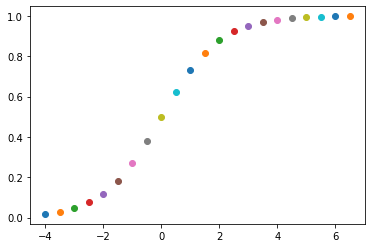

In [ ]:
def h1(r):
  return np.divide(1,(1+np.exp(-1*r)))
x_11=np.arange(-4,7,.5)
x_22=np.arange(-4,10,.5)
for i in x_11:
  plt.scatter(i,h1(i))
plt.show()

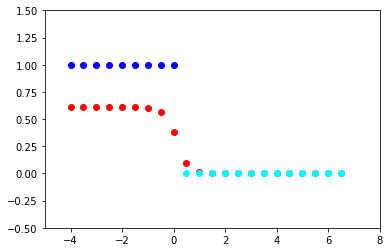

In [ ]:
def h1(r):
  return np.divide(  1,(1+np.exp(-1*(np.array([1,r])*theta1)).sum())  )

x_11=np.arange(-4,7,.5)
x_22=np.arange(-4,10,.5)
r=0
for i in x_11:
  plt.scatter(i,h1(i),c='red')
for i in x_11:
  x_1=i
  aa=np.divide(1,(1+np.exp((-1*(np.array([1,x_1])*theta1)).sum())))#theta[0]=clase 1
  if(round(aa)==1):
    plt.scatter(x_1,1,c='blue')
  else:#(ds.iloc[r,-1:].values==3)
    plt.scatter(x_1,0,c='aqua')      
  r+=1
plt.xlim([-5,8])
plt.ylim([-0.5,1.5])
plt.show()#todos los puntos azules te los manda a uno por a=[[-3,1]] todos los puntos aqua te los manda a cero por b=[[8,0]]
#solo se da un punto por las condiciones de entrenamiento

In [ ]:
#da un punto en la zona azul y será 1, da un punto en la zona aqua y será 0
x=0;
round(np.divide(1,(1+np.exp((-1*(np.array([1,x])*theta1)).sum()))))

1

In [ ]:
a=[[-3,-3,1],[-3,-2,1],[-2,-3,1],[-2,-1,1],[2,2,1],[2,1,1],[2,0,1],[1,0,1],[1,2,1],[0,-1,1]]
b=[[1,8,2],[1,9,2],[2,8,2],[2,10,2]]
c=[[5,3,3],[5,4,3],[6,3,3],[6,5,3]]

In [ ]:
x1=[]
x2=[]
y =[]

[x1.append(a[i][0]) for i in range(len(a))]
[x1.append(b[i][0]) for i in range(len(b))]
[x1.append(c[i][0]) for i in range(len(c))]

[x2.append(a[i][1]) for i in range(len(a))]
[x2.append(b[i][1]) for i in range(len(b))]
[x2.append(c[i][1]) for i in range(len(c))]

[y.append(a[i][2]) for i in range(len(a))]
[y.append(b[i][2]) for i in range(len(b))]
[y.append(c[i][2]) for i in range(len(c))]

x0=[1]*len(x1)

ds=pd.DataFrame((x0,x1,x2,y),index=('x0','x1','x2','y')).T

In [ ]:
import sklearn.preprocessing 
from sklearn.compose import make_column_transformer
ohe=make_column_transformer((sklearn.preprocessing.OneHotEncoder(),[3]))

In [ ]:
ds1=pd.DataFrame(np.array(np.concatenate((ds.iloc[:,:-1].values,ohe.fit_transform(ds)),axis=1),dtype=np.int))
ds1.head(11)

,0,1,2,3,4,5
0,1,-3,-3,1,0,0
1,1,-3,-2,1,0,0
2,1,-2,-3,1,0,0
3,1,-2,-1,1,0,0
4,1,2,2,1,0,0
5,1,2,1,1,0,0
6,1,2,0,1,0,0
7,1,1,0,1,0,0
8,1,1,2,1,0,0
9,1,0,-1,1,0,0


In [ ]:
theta1=np.random.random(3)
theta1

array([0.5924586 , 0.91281533, 0.07273606])

In [ ]:
#theta1=np.random.random(3)
si=0
#th=0
def h(r):
  return np.divide(1,(1+np.exp(-1*r)))

for r in range(6):
  for th in range(3):
    for i in range(len(ds1.iloc[:,0])):
      th11=(ds1.iloc[i,:-3].values*theta1).sum()
      si=si+(( ds1.iloc[i,-3]-h(th11) )*ds1.iloc[i,th])
    for m1 in range(100):
      theta1[th]=theta1[th]+(0.005*si)

In [ ]:
def fun(r):
  return np.divide(1,(1+np.exp(-1*r)))
for i in range(len(ds1.iloc[:,0])):
  print((i)*-1,ds1.iloc[i,:-2].values,round(fun((np.array(ds1.iloc[i,:-3].values)*theta1).sum())))
#4   2,2
#5   2,1
#8   1,2
#bien claeificados 1 7/10 mal claseificados 3/10
#bien claseficados 0 8/8  mal clasificados 0/8
#con if
#bien claeificados 1 10/10 mal claseificados 0/10
#bien claseficados 0 0/8  mal clasificados 8/8


0 [ 1 -3 -3  1] 1
-1 [ 1 -3 -2  1] 1
-2 [ 1 -2 -3  1] 1
-3 [ 1 -2 -1  1] 1
-4 [1 2 2 1] 0
-5 [1 2 1 1] 1
-6 [1 2 0 1] 1
-7 [1 1 0 1] 1
-8 [1 1 2 1] 0
-9 [ 1  0 -1  1] 1
-10 [1 1 8 0] 0
-11 [1 1 9 0] 0
-12 [1 2 8 0] 0
-13 [ 1  2 10  0] 0
-14 [1 5 3 0] 0
-15 [1 5 4 0] 0
-16 [1 6 3 0] 0
-17 [1 6 5 0] 0


In [ ]:
d=4#ver q pdo con los q estan mal
fun((np.array(ds1.iloc[d,:-3].values)*theta1).sum()),(np.array(ds1.iloc[d,:-3].values)*theta1).sum()

(0.0002446782303285119, -8.315321848042721)

In [ ]:
for i in range(len(ds1.iloc[:,0])):#hasta el 9 tiene q ser 1 luego cero
  th11=(np.array(ds1.iloc[i,:-3].values)*theta1).sum()
  hx=np.divide(1,(1+np.exp(-1*th11)))
  k=0
  while(k<10):
    theta1[0]=theta1[0]+(0.005*((ds1.iloc[i,-3]-hx)*ds1.iloc[i,0]))
    k+=1

In [ ]:
for i in range(len(ds1.iloc[:,0])):#hasta el 9 tiene q ser 1 luego cero
  th11=(np.array(ds1.iloc[i,:-3].values)*theta1).sum()
  hx=np.divide(1,(1+np.exp(-1*th11)))
  k=0
  while(k<10):
    theta1[1]=theta1[1]+(0.005*((ds1.iloc[i,-3]-hx)*ds1.iloc[i,1]))
    k+=1

In [ ]:
for i in range(len(ds1.iloc[:,0])):#hasta el 9 tiene q ser 1 luego cero
  th11=(np.array(ds1.iloc[i,:-3].values)*theta1).sum()
  hx=np.divide(1,(1+np.exp(-1*th11)))
  k=0
  while(k<10):
    theta1[2]=theta1[2]+(0.005*((ds1.iloc[i,-3]-hx)*ds1.iloc[i,2]))
    k+=1

In [ ]:
def fun(r):
  return np.divide(1,(1+np.exp(-1*r)))
for i in range(len(ds1.iloc[:,0])):
  print((i)*-1,ds1.iloc[i,:-2].values,round(fun((np.array(ds1.iloc[i,:-3].values)*theta1).sum())))

0 [ 1 -3 -3  1] 1
-1 [ 1 -3 -2  1] 1
-2 [ 1 -2 -3  1] 1
-3 [ 1 -2 -1  1] 1
-4 [1 2 2 1] 0
-5 [1 2 1 1] 0
-6 [1 2 0 1] 1
-7 [1 1 0 1] 1
-8 [1 1 2 1] 0
-9 [ 1  0 -1  1] 1
-10 [1 1 8 0] 0
-11 [1 1 9 0] 0
-12 [1 2 8 0] 0
-13 [ 1  2 10  0] 0
-14 [1 5 3 0] 0
-15 [1 5 4 0] 0
-16 [1 6 3 0] 0
-17 [1 6 5 0] 0


In [ ]:
a=[[-3,-3,1],[-3,-2,1],[-2,-3,1],[-2,-1,1],[2,2,1],[2,1,1],[2,0,1],[1,0,1],[1,2,1],[0,-1,1]]
b=[[1,8,2],[1,9,2],[2,8,2],[2,10,2]]
c=[[5,3,3],[5,4,3],[6,3,3],[6,5,3]]
x1=[]
x2=[]
y =[]

[x1.append(a[i][0]) for i in range(len(a))]
[x1.append(b[i][0]) for i in range(len(b))]
[x1.append(c[i][0]) for i in range(len(c))]

[x2.append(a[i][1]) for i in range(len(a))]
[x2.append(b[i][1]) for i in range(len(b))]
[x2.append(c[i][1]) for i in range(len(c))]

[y.append(a[i][2]) for i in range(len(a))]
[y.append(b[i][2]) for i in range(len(b))]
[y.append(c[i][2]) for i in range(len(c))]

x0=[1]*len(x1)

ds=pd.DataFrame((x0,x1,x2,y),index=('x0','x1','x2','y')).T
import sklearn.preprocessing 
from sklearn.compose import make_column_transformer
ohe=make_column_transformer((sklearn.preprocessing.OneHotEncoder(),[3]))
ds1=pd.DataFrame(np.array(np.concatenate((ds.iloc[:,:-1].values,ohe.fit_transform(ds)),axis=1),dtype=np.int))
theta=np.random.random([3,3])

In [ ]:
theta=np.random.random([3,3])
theta

array([[0.46020898, 0.46769055, 0.26076945],
       [0.16624793, 0.34379571, 0.85122407],
       [0.38734117, 0.87104945, 0.80717993]])

In [ ]:
lon=100
for cls in range(len(theta)):#entre 0 y el numero de clases menos 1 vectores theta 0<cls<3#cuenta el numero de listas dentro
  for the in range(len(theta[cls])):#es cuantas variables tengo mas 1 del modelo lineal   0<the<3
    for i in range(len(ds1.iloc[:,0])):
      th11=(np.array(ds1.iloc[i,:-3])*theta[cls]).sum()
      hx=np.divide(1,(1+np.exp(-1*th11)))
      theta[cls][the]=theta[cls][the]+(0.005*((ds1.iloc[i,-3+cls]-hx)*ds1.iloc[i,the]))

In [ ]:
def fun(r):
  return np.divide(1,(1+np.exp(-1*r)))
for i in range(len(ds1.iloc[:,0])):
  print((i)*-1,ds1.iloc[i,:-2].values,round(fun((np.array(ds1.iloc[i,:-3].values)*theta[0]).sum())))

In [ ]:
def fun(r):
  return np.divide(1,(1+np.exp(-1*r)))
for i in range(len(ds1.iloc[:,0])):
 print((i),ds1.iloc[i,:-3].values,ds1.iloc[i,-2:-1].values,round(fun((np.array(ds1.iloc[i,:-3].values)*theta[1]).sum())))

In [ ]:
def fun(r):
  return np.divide(1,(1+np.exp(-1*r)))
for i in range(len(ds1.iloc[:,0])):
  print((i),ds1.iloc[i,:-3].values,ds1.iloc[i,-1:].values,round(fun((np.array(ds1.iloc[i,:-3].values)*theta[2]).sum())))

In [ ]:
for i in range(len(ds1.iloc[:,0])):
  ex=np.dot(ds1.iloc[i,:-3].values,theta.T)#primer dato por vector de clase 1, una "probabilidad" falta exponenciarla y normalizar
  ex=np.exp(ex)#falta normalizar para que sea probabilidad
  sumi=ex[0]+ex[1]+ex[2]
  p=[ex[0]/sumi,ex[1]/sumi,ex[2]/sumi]
  print(p)
  print(i,ds1.iloc[i,-3:].values,round(p[0]),round(p[1]),round(p[2]))
  print(np.array_equal(np.array([round(p[0]),round(p[1]),round(p[2])]),ds1.iloc[i,-3:].values))
  print('\n')

[0.9996015996632489, 0.0003724762021490286, 2.5924134601988404e-05]
0 [1 0 0] 1 0 0
True


[0.9984310193462943, 0.0015227474233573033, 4.623323034842963e-05]
1 [1 0 0] 1 0 0
True


[0.9996137167636946, 0.00029119584807837647, 9.508738822707284e-05]
2 [1 0 0] 1 0 0
True


[0.9948433656463411, 0.004854942824113464, 0.0003016915295453958]
3 [1 0 0] 1 0 0
True


[0.6956966332909313, 0.0869539884530259, 0.2173493782560427]
4 [1 0 0] 1 0 0
True


[0.8295218028257665, 0.025331399891058932, 0.14514679728317453]
5 [1 0 0] 1 0 0
True


[0.9046010093296358, 0.006749167919426764, 0.08864982275093737]
6 [1 0 0] 1 0 0
True


[0.9650071018471307, 0.009209632309902618, 0.025783265842966748]
7 [1 0 0] 1 0 0
True


[0.8031771337981026, 0.12841021048250317, 0.0684126557193943]
8 [1 0 0] 1 0 0
True


[0.9929871811017779, 0.002961664233213662, 0.004051154665008497]
9 [1 0 0] 1 0 0
True


[0.0013237790755999666, 0.9950228504315206, 0.0036533704928794586]
10 [0 1 0] 0 1 0
True


[0.0003244204838732437, 0.998

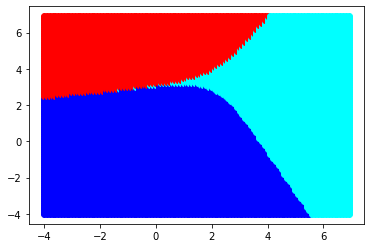

In [ ]:
for i in range(len(ds1.iloc[:,0])):
  ex=np.dot(ds1.iloc[i,:-3].values,theta.T)#primer dato por vector de clase 1, una "probabilidad" falta exponenciarla y normalizar
  ex=np.exp(ex)#falta normalizar para que sea probabilidad
  sumi=ex[0]+ex[1]+ex[2]
  p=[ex[0]/sumi,ex[1]/sumi,ex[2]/sumi]
x_11=np.arange(-4,7,.1);x_22=np.arange(-4,7,.1);r=0
for i in x_11:
  x_1=i
  for j in x_22:
    x_2=j
    aa=np.dot(np.array([1,x_1,x_2]),theta.T)#theta[0]=clase 1
    aa=np.exp(aa)
    summ=aa[0]+aa[1]+aa[2]
    p=[aa[0]/summ,aa[1]/summ,aa[2]/summ]
    if(round(p[0])==1):
      plt.scatter(x_1,x_2,c='blue')
    elif(round(p[1])==1):
      plt.scatter(x_1,x_2,c='red')
    else:#(ds.iloc[r,-1:].values==3)
      plt.scatter(x_1,x_2,c='aqua')      
    r+=1
plt.show()


#print(p)
#print(i,ds1.iloc[i,-3:].values,round(p[0]),round(p[1]),round(p[2]))
#print(np.array_equal(np.array([round(p[0]),round(p[1]),round(p[2])]),ds1.iloc[i,-3:].values))
#print('\n')


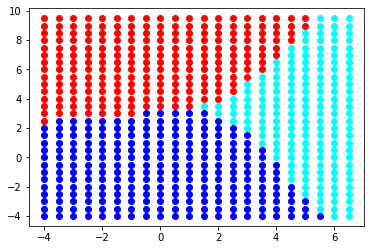

In [ ]:
x_11=np.arange(-4,7,.5)
x_22=np.arange(-4,10,.5)
r=0
for i in x_11:
  x_1=i
  for j in x_22:
    x_2=j
    aa=np.exp((np.array([1,x_1,x_2])*theta[0]).sum())#theta[0]=clase 1
    ab=np.exp((np.array([1,x_1,x_2])*theta[1]).sum())#theta[0]=clase 2
    ac=np.exp((np.array([1,x_1,x_2])*theta[2]).sum())#theta[0]=clase 3
    if(round(aa/(aa+ab+ac))==1):
      plt.scatter(x_1,x_2,c='blue')
    elif(round(ab/(aa+ab+ac))==1):
      plt.scatter(x_1,x_2,c='red')
    else:#(ds.iloc[r,-1:].values==3)
      plt.scatter(x_1,x_2,c='aqua')      
    r+=1
plt.show()

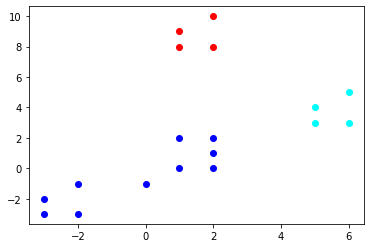

In [ ]:
r=0
for i,j in ds.iloc[:,1:3].values:
  if(ds.iloc[r,-1:].values==1):
    plt.scatter(i,j,c='blue')
  elif(ds.iloc[r,-1:].values==2):
    plt.scatter(i,j,c='red')
  else:#(ds.iloc[r,-1:].values==3)
    plt.scatter(i,j,c='aqua')      
  r+=1
plt.show()
#ES LA CLASE NUMERO 1 O [1,0,0] LOS Q ESTAN ABAJO A LA IZQUIERDA "AZULES"
#ES LA CLASE NUMERO 2 O [0,1,0] LOS Q ESTAN EN MEDIO ARRIBA "ROJOS"
#ES LA CLASE NUMERO 3 O [0,0,1] LOS Q ESTAN EN MEDIO DERECHA "AQUA"
#2,2
#2,1
#1,2